In [1]:
### Benjamin Tollison ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sympy as sp
from IPython.display import Latex, Math, display
from sympy import (
    Eq,
    Function,
    Matrix,
    cos,
    cosh,
    exp,
    integrate,
    lambdify,
    pi,
    sin,
    sinh,
    symbols,
)
from sympy.solvers.pde import pdsolve
from sympy.solvers.solveset import linsolve


def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
deg2rad = np.pi/180
rad2deg = 180/np.pi

In [2]:
# Global constants for the assignment
mu = 398600.44 # km^3/s^2
J2 = 1.08262668e-3
Req = 6378 # km
omega_E = 7.22921e-5 # rad/s
sidereal_day = 86164 # s

In [3]:
# Problem 1
a = (mu**0.5/(10*omega_E))**(2/3)
displayVariableWithUnits('a',round(a,5),'km')
Omega_ss = 2*np.pi/(365.25*24*60*60) # rad/s
i = np.arccos(-(mu**0.5/(10*omega_E))**(7/3)*((2*Omega_ss)/(3*Req**2*J2*mu**0.5)))
displayVariableWithUnits('i',round(i*rad2deg,3),'deg')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

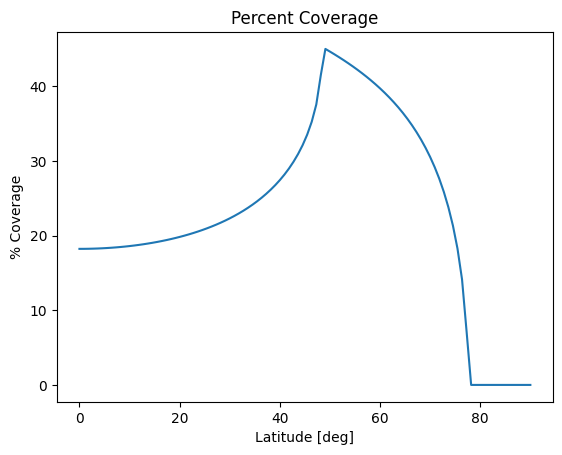

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
# Problem 2
nadiar = np.arcsin((Req/(Req+900))*np.cos(20*deg2rad))
displayVariable('\\eta',nadiar*rad2deg)
swath_width_half = np.pi/2 - 20*deg2rad - nadiar
displayVariable('\\Lambda_{max}',swath_width_half*rad2deg)
lat = np.linspace(0,np.pi/2,100)
inclination = 63*deg2rad
# print(63+swath_width_half*rad2deg,63-swath_width_half*rad2deg)
def PercentCoverage(latitude):
  phi_1 = lambda Lat: np.arccos((-np.sin(swath_width_half)+np.cos(inclination)*np.sin(Lat))/(np.sin(inclination)*np.cos(Lat)))
  phi_2 = lambda Lat: np.arccos((np.sin(swath_width_half)+np.cos(inclination)*np.sin(Lat))/(np.sin(inclination)*np.cos(Lat)))
  # phi_1 = lambda Lat: (np.sin(swath_width_half) + cos(inclination)*np.sin(Lat))/(np.sin(inclination)*np.cos(Lat))
  if latitude >= swath_width_half+inclination:
    return 0
  if inclination+swath_width_half > latitude> inclination - swath_width_half:
    return phi_1(latitude)*100/np.pi
  if inclination-swath_width_half >latitude >= 0:
    # print((phi_1(latitude)-phi_2(latitude))/np.pi)
    return (phi_1(latitude)-phi_2(latitude))*100/np.pi
plt.plot(lat*rad2deg,[PercentCoverage(l) for l in lat])
plt.title('Percent Coverage')
plt.xlabel('Latitude [deg]')
plt.ylabel('% Coverage')
plt.show()
earth_circum = 2*np.pi*Req
displayVariableWithUnits('Swath',2*swath_width_half*earth_circum/(2*np.pi),'km')
drift_angle = omega_E*2*np.pi*((Req+900)**3/mu)**0.5
displayVariable('\\Delta{\\lambda_\\Omega}',drift_angle*rad2deg)
displayVariable('AngularSwath',2*swath_width_half*rad2deg)

In [56]:
# Problem 3
nadiar = 62*deg2rad
grazing = 15*deg2rad
inclination = 62*deg2rad
h_min = Req*np.cos(grazing)/np.sin(nadiar) - Req
displayVariableWithUnits('h_{min}',h_min,'km')
# part b
nadiar = np.arcsin((Req/(Req+700))*np.cos(grazing))
displayVariable('\\eta',nadiar*rad2deg)
earth_centered_angle = np.pi/2 - grazing - nadiar
displayVariable('\\Lambda',earth_centered_angle*rad2deg)
alpha = (75/90)
displayVariable('\\alpha',alpha)
N_sat_min = -(2*alpha//(np.cos(earth_centered_angle)-1))
displayVariable('N_{sat\,min}',N_sat_min)
time_period = 2*np.pi*((Req+700)**3/mu)**0.5
displayVariableWithUnits('TP',time_period,'sec')
N_p = -(np.pi//-(2*nadiar+omega_E*time_period))
displayVariable('N_p',N_p)
N_sat = N_p*N_sat_min
displayVariable('N_{sat}',N_sat)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>